In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import pandas as pd
import sys

project_dir = os.sep.join([os.getcwd(), '..'])
sys.path.append(os.sep.join([project_dir, 'src', 'features']))
import build_features

%matplotlib inline

# Meteorological data

In [2]:
df_met = build_features.met_load_data(os.sep.join([project_dir, 'data', 'interim']))
df_met.describe()

,air_temperature,max(wind_speed PT1H),max_wind_speed(wind_from_direction PT1H),relative_humidity,sum(duration_of_sunshine PT1H),weather_type,over_time(weather_type_primary_significance PT6H),over_time(weather_type_secondary_significance PT6H),sum(precipitation_amount PT1H)
count,17074.000000,17074.000000,17074.000000,17074.000000,17056.000000,3847.000000,3831.000000,3832.000000,17074.000000
mean,10.639382,3.531680,129.836711,70.930596,15.582727,12.484533,2.889063,1.509395,0.094155
std,7.827032,1.711191,97.377514,20.618886,23.973154,21.956990,2.590697,1.570052,0.501781
min,-14.100000,0.400000,1.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000,2.200000,33.000000,55.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,11.800000,3.200000,142.000000,75.000000,0.000000,2.000000,2.000000,2.000000,0.000000
75%,16.300000,4.500000,209.000000,89.000000,33.000000,3.000000,6.000000,2.000000,0.000000
max,34.400000,12.600000,360.000000,100.000000,60.000000,91.000000,9.000000,8.000000,17.100000


In [3]:
delete_original_columns = False
df_met = build_features.met_rename_columns(df_met)

## Wind direction

In [4]:
df_met = build_features.met_transform_wind_direction(df_met, delete_original=delete_original_columns)

In [5]:
df_met[['wind_direction', 'wind_direction_cat'] if not delete_original_columns else ['wind_direction_cat']].head(10)

,wind_direction,wind_direction_cat
0,335.0,7
1,354.0,0
2,358.0,0
3,42.0,1
4,244.0,5
5,205.0,5
6,141.0,3
7,200.0,4
8,203.0,5
9,201.0,4


In [6]:
df_met.head(5)

,index,temperature,wind_speed,wind_direction,humidity,sunshine,weather1,weather2,weather3,precipitation,wind_direction_cat
0,2016-04-01 00:00:00+00:00,2.1,6.0,335.0,46.0,0.0,1.0,2.0,0.0,0.0,7
1,2016-04-01 01:00:00+00:00,2.2,5.7,354.0,45.0,0.0,NaN,NaN,NaN,0.0,0
2,2016-04-01 02:00:00+00:00,0.7,5.8,358.0,51.0,0.0,NaN,NaN,NaN,0.0,0
3,2016-04-01 03:00:00+00:00,-0.3,2.0,42.0,55.0,0.0,2.0,0.0,0.0,0.0,1
4,2016-04-01 04:00:00+00:00,-1.8,2.2,244.0,62.0,0.0,NaN,NaN,NaN,0.0,5


## Weather features

In [7]:
df_met.describe()

,temperature,wind_speed,wind_direction,humidity,sunshine,weather1,weather2,weather3,precipitation,wind_direction_cat
count,17074.000000,17074.000000,17074.000000,17074.000000,17056.000000,3847.000000,3831.000000,3832.000000,17074.000000,17074.000000
mean,10.639382,3.531680,129.836711,70.930596,15.582727,12.484533,2.889063,1.509395,0.094155,2.761450
std,7.827032,1.711191,97.377514,20.618886,23.973154,21.956990,2.590697,1.570052,0.501781,2.070075
min,-14.100000,0.400000,1.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,2.200000,33.000000,55.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000
50%,11.800000,3.200000,142.000000,75.000000,0.000000,2.000000,2.000000,2.000000,0.000000,3.000000
75%,16.300000,4.500000,209.000000,89.000000,33.000000,3.000000,6.000000,2.000000,0.000000,5.000000
max,34.400000,12.600000,360.000000,100.000000,60.000000,91.000000,9.000000,8.000000,17.100000,7.000000


In [8]:
df_met[['index', 'weather1', 'weather2', 'weather3']].head(72).tail(4)

,index,weather1,weather2,weather3
68,2016-04-03 21:00:00+00:00,58.0,6.0,5.0
69,2016-04-03 22:00:00+00:00,NaN,NaN,NaN
70,2016-04-03 23:00:00+00:00,NaN,NaN,NaN
71,2016-04-04 00:00:00+00:00,NaN,NaN,NaN


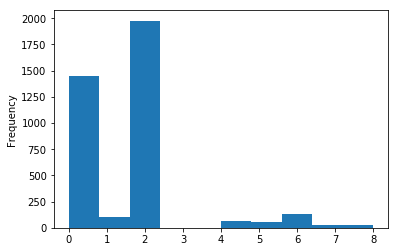

In [9]:
import functools
import matplotlib.pyplot as plt
weather_codes = functools.reduce(lambda a, b: a | set(df_met[b].dropna().values), ['weather1', 'weather2', 'weather3'], set())
df_met.weather3.plot.hist()

In [10]:
df_met = build_features.met_transform_weather(df_met, delete_original=delete_original_columns)

In [11]:
df_met.describe()

,temperature,wind_speed,wind_direction,humidity,sunshine,weather1,weather2,weather3,precipitation,wind_direction_cat,weather_fair/cloudy,weather_fog/haze,weather_thunderstorm,weather_rain,weather_snow,weather_other
count,17074.000000,17074.000000,17074.000000,17074.000000,17056.000000,3847.000000,3831.000000,3832.000000,17074.000000,17074.000000,17074.00000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000
mean,10.639382,3.531680,129.836711,70.930596,15.582727,12.484533,2.889063,1.509395,0.094155,2.761450,0.62522,0.211491,0.002636,0.111632,0.018508,0.000176
std,7.827032,1.711191,97.377514,20.618886,23.973154,21.956990,2.590697,1.570052,0.501781,2.070075,0.48408,0.408378,0.051272,0.314922,0.134782,0.013255
min,-14.100000,0.400000,1.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,2.200000,33.000000,55.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.800000,3.200000,142.000000,75.000000,0.000000,2.000000,2.000000,2.000000,0.000000,3.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.300000,4.500000,209.000000,89.000000,33.000000,3.000000,6.000000,2.000000,0.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.400000,12.600000,360.000000,100.000000,60.000000,91.000000,9.000000,8.000000,17.100000,7.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df_met['weather_fair/cloudy'].sum() + df_met['weather_fog/haze'].sum() + df_met['weather_thunderstorm'].sum() + df_met['weather_rain'].sum() + df_met['weather_snow'].sum() + df_met['weather_other'].sum()

16556.0

In [13]:
len(df_met)

17074

In [14]:
# The following generates A LOT OF data, because during night time, no observations are logged, so none of the weather features is set.
#for id, row in df_met.iterrows():
#    if (row['weather_fair/cloudy'] == 0 and row['weather_fog/haze'] == 0 and row['weather_thunderstorm'] == 0 and row['weather_rain'] == 0 and row['weather_snow'] == 0 and row['weather_other'] == 0):
#        print(id, row)

# Bicycle data
A quick glance at the trip data. The negative-time and >2 hours trips have been removed, but the transformation to net demand has not been done. Check whether everything is chronological.

In [20]:
df_bike = pd.read_feather(os.sep.join([project_dir, 'data', 'interim', 'trips.feather']))
df_bike.dtypes

index                       int64
Start station             float64
Start time         datetime64[ns]
End station               float64
End time           datetime64[ns]
DurationSeconds           float64
dtype: object

In [16]:
df_bike.head()

,index,Start station,Start time,End station,End time,DurationSeconds
0,0,283.0,2016-10-01 04:00:08,238.0,2016-10-01 04:09:47,579.0
1,1,169.0,2016-10-01 04:00:41,175.0,2016-10-01 04:11:07,626.0
2,2,211.0,2016-10-01 04:01:02,162.0,2016-10-01 04:15:52,890.0
3,3,200.0,2016-10-01 04:01:20,163.0,2016-10-01 04:15:04,824.0
4,4,157.0,2016-10-01 04:02:16,163.0,2016-10-01 04:04:29,133.0


In [17]:
if False:
    previous_time = pd.Timestamp('2010-01-01T12')
    for id, row in df_bike.iterrows():
        if previous_time > row['Start time']:
            print("""Row: {0:8d}  Previous: {p}  Current start: {r1}  Current end: {r2}""".format(id, p = str(previous_time), r1 = str(row['Start time']), r2 = str(row['End time'])))
        previous_time = row['Start time']

In [18]:
df_bike.index

RangeIndex(start=0, stop=6899134, step=1)

So not everything is in chronological order (at least not by start time), but that does not matter anyway, since we process line by line when generating net demand, and we are not dependent on order when sorting into the net demand dataframe.

## Overview of the number of bike trips per month

In [19]:
df_bike['Start time'].groupby([df_bike['Start time'].dt.year, df_bike['Start time'].dt.month]).agg('count')

Start time  Start time
2016        4             180375
            5             256841
            6             278843
            7             280027
            8             349714
            9             366827
            10            237609
            11            105944
            12             15235
2017        4             233311
            5             421953
            6             440653
            7             386689
            8             468370
            9             362229
            10            275990
            11            116319
            12                 6
2018        3                  9
            4             269622
            5             496921
            6             484195
            7             426970
            8             444482
Name: Start time, dtype: int64